
# **Toy model: Metrapolis Algorithm in 1D**

In [192]:
!python -m pip install -U pip
!pip install -U setuptools setuptools_scm pep517
!pip install -U corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [193]:
import numpy as np
import matplotlib.pyplot as plt
import corner

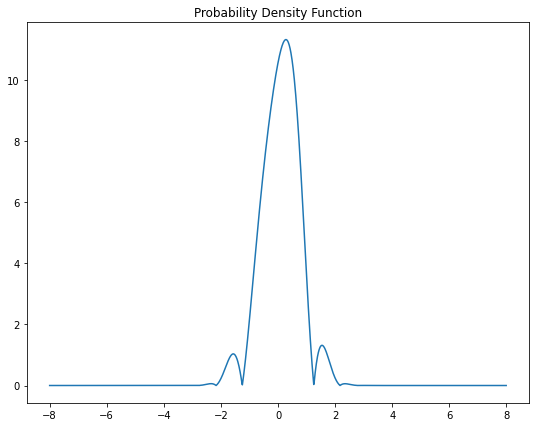

In [194]:
# Probability Density Function
def targetdist(x):
  probX = abs(np.cos(x**2)*(21+np.sin(x+3)))/(np.exp(x**2)+np.exp(-x))
  return probX
x = np.arange(-8,8, 0.01)
y = targetdist(x)

plt.figure(figsize=(9,7))
plt.plot(x, y)
plt.title("Probability Density Function")
plt.show()

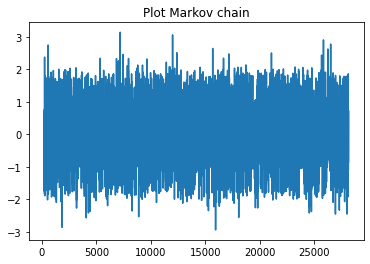

In [172]:
# Markov chain Method with only 1 walker----------------------------------------------

nchain=[]
achain=[]
post_chain=[]          # Posterior Chain
a0=-5                  # Initial value
s=50000                # No of steps
burnout_time= 200      # Burnout Time
t=0

for i in range(1,s):
  a_new= a0+np.random.normal(0,0.2)
  alpha = targetdist(a_new) / targetdist(a0)
  u=np.random.uniform(0,1)

  if alpha>=u:
    t=t+1
    if t>=burnout_time:
      nchain.append(t)
      achain.append(a_new)
      post_chain.append(targetdist(a_new))
    a0=a_new
  else:
    a0=a0

# Plot Markov chain
plt.plot(nchain,achain)
plt.title("Plot Markov chain")
plt.show()

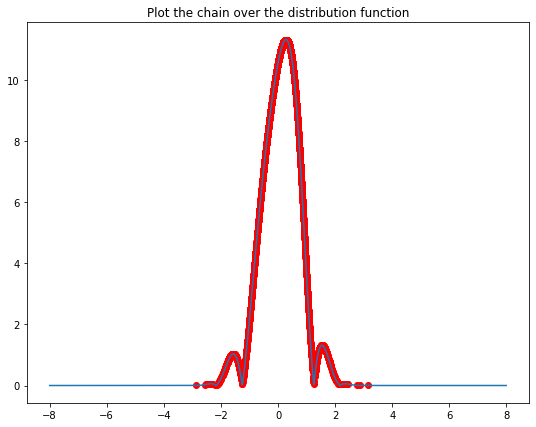

In [173]:
"""
def targetdist(x):
  probX = abs(np.sin(x+2)/(1+x**2))
  return probX
x = np.arange(-8,8, 0.01)
y = targetdist(x)
"""

plt.figure(figsize=(9,7))
plt.plot(x,y)
plt.title("Plot the chain over the distribution function")

for i in range(0,10000):
  plt.scatter(achain[i],post_chain[i],color='red')
plt.show()

# **Plot the histogram of the quantity of interest**

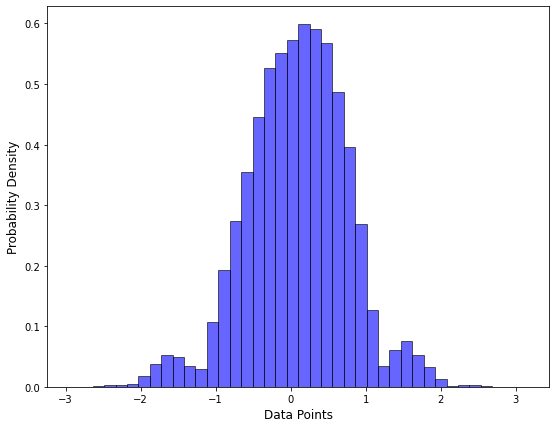

In [174]:
plt.figure(figsize=(9,7))
plt.hist(achain, bins=40, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel("Data Points",size='12')
plt.ylabel("Probability Density",size='12')
plt.show()

In [175]:
sl,mean,sm= np.percentile(achain,[16, 50, 84],axis=0)
neg_error= mean-sl
pos_error= sm-mean
print("MCMC OUTCOME:= {} + {} -{}".format(mean,pos_error,neg_error))

MCMC OUTCOME:= 0.10656910926778906 + 0.6082568293389448 -0.6589487089491639


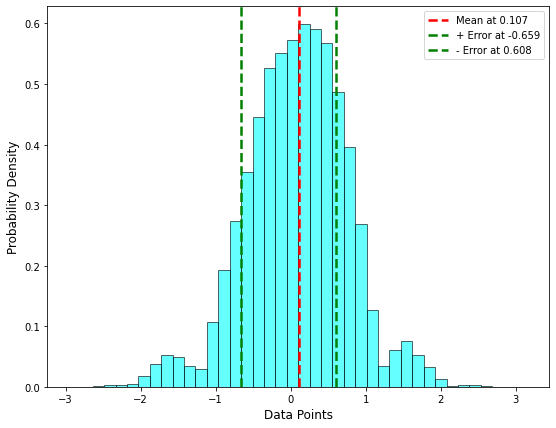

In [176]:
meas=[mean,-neg_error,pos_error]
name=["Mean","+ Error","- Error"]

plt.figure(figsize=(9,7))
plt.hist(achain, bins=40, density=True, alpha=0.6, color='cyan', edgecolor='black')
for measurement, name, color in zip(meas,name,["red","green","green"]):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name,round(measurement,3)), c=color)
plt.xlabel("Data Points",size='12')
plt.ylabel("Probability Density",size='12')
plt.legend(loc="upper right")
plt.show()

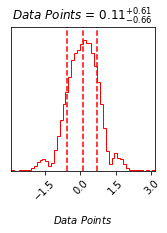

In [177]:
c=np.array([achain]).T
fig = corner.corner(c,bins=50,labels=["$Data$ $Points$"],color="red",quantiles=[0.16, 0.5, 0.84],show_titles=True,divergences=True)
plt.show() 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [179]:
# Markov chain Method with multiple walkers---------------------------

walker= 10                          
nchain_list = []
achain_list = []
post_chain_list=[] 

for i in range(0,walker):
  t=0
  a0=np.random.normal(0,1)
  steps=2000
  burnout_time= 100
  nchain=[]
  achain=[]
  posteriorchain=[]
  
  for j in range(0,steps):
    anew= a0+np.random.normal(0,0.1)
    alpha = targetdist(anew) / targetdist(a0)
    u=np.random.uniform(0,1)
    
    if alpha>=u:
      t=t+1
      if t>=burnout_time:
        nchain.append(t)
        achain.append(anew)
        posteriorchain.append(targetdist(anew))
      a0=anew

  nchain_list.append(nchain)
  achain_list.append(achain)
  post_chain_list.append(posteriorchain)

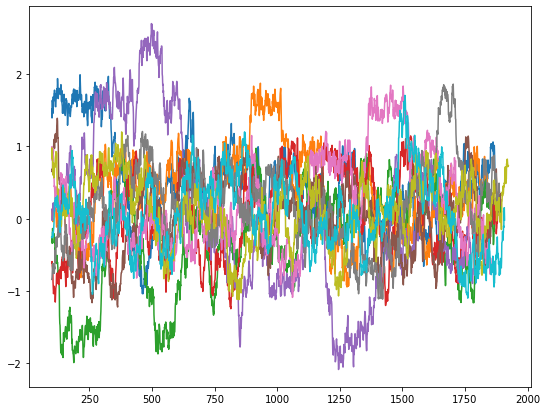

In [180]:
merge=[] # Container for conataining every value of achain in simple 1-D array

plt.figure(figsize=(9,7))
for i in range(0,walker):
  n=nchain_list[i]
  a=achain_list[i]
  merge.extend(a) 
  plt.plot(n,a)

plt.show()

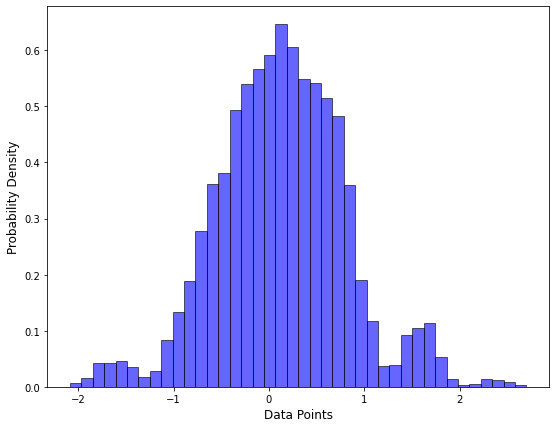

In [181]:
plt.figure(figsize=(9,7))
plt.hist(merge, bins=40, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel("Data Points",size='12')
plt.ylabel("Probability Density",size='12')
plt.show()

In [182]:
sl,mean,sm= np.percentile(merge,[16, 50, 84],axis=0)
neg_error= mean-sl
pos_error= sm-mean
print("MCMC OUTCOME:= {} + {} -{}".format(mean,pos_error,neg_error))

MCMC OUTCOME:= 0.12861300417006832 + 0.6115438283545971 -0.6372035927356179


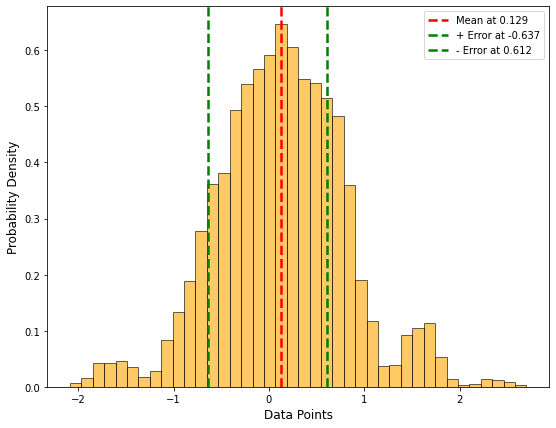

In [183]:
meas=[mean,-neg_error,pos_error]
name=["Mean","+ Error","- Error"]

plt.figure(figsize=(9,7))
plt.hist(merge, bins=40, density=True, alpha=0.6, color='orange', edgecolor='black')
for measurement, name, color in zip(meas,name,["red","green","green"]):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name,round(measurement,3)), c=color)
plt.xlabel("Data Points",size='12')
plt.ylabel("Probability Density",size='12')
plt.legend(loc="upper right")
plt.show()

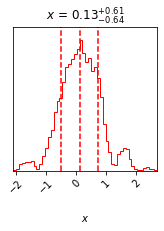

In [184]:
cc=np.array([merge])
bb=cc.transpose()
fig = corner.corner(bb,bins=50,labels=["$x$"],color="red",quantiles=[0.16, 0.5, 0.84],show_titles=True,divergences=True)

plt.savefig("toy_model2.png",dpi=800)
plt.show() 

**Trying with different PDF for proposal function----------------------------------------------------------**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


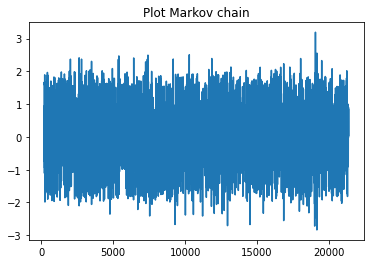

In [201]:
# Markov chain Method with only 1 walker----------------------------------------------

nchain=[]
achain=[]
post_chain=[]          # Posterior Chain
a0=-5                  # Initial value
s=50000                # No of steps
burnout_time= 200      # Burnout Time
t=0

for i in range(1,s):
  a_new= a0+np.random.standard_cauchy()
  alpha = targetdist(a_new) / targetdist(a0)
  u=np.random.uniform(0,1)

  if alpha>=u:
    t=t+1
    if t>=burnout_time:
      nchain.append(t)
      achain.append(a_new)
      post_chain.append(targetdist(a_new))
    a0=a_new
  else:
    a0=a0

# Plot Markov chain
plt.plot(nchain,achain)
plt.title("Plot Markov chain")
plt.show()

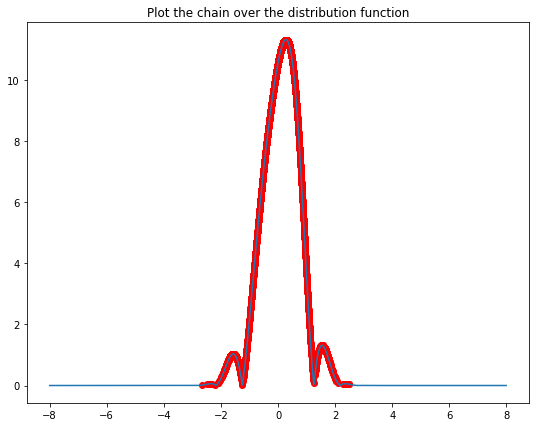

In [202]:
plt.figure(figsize=(9,7))
plt.plot(x,y)
plt.title("Plot the chain over the distribution function")

for i in range(0,10000):
  plt.scatter(achain[i],post_chain[i],color='red')
plt.show()

In [203]:
sl,mean,sm= np.percentile(achain,[16, 50, 84],axis=0)
neg_error= mean-sl
pos_error= sm-mean
print("MCMC OUTCOME:= {} + {} -{}".format(mean,pos_error,neg_error))

MCMC OUTCOME:= 0.08485032029385231 + 0.6130114575474187 -0.6711142273337362


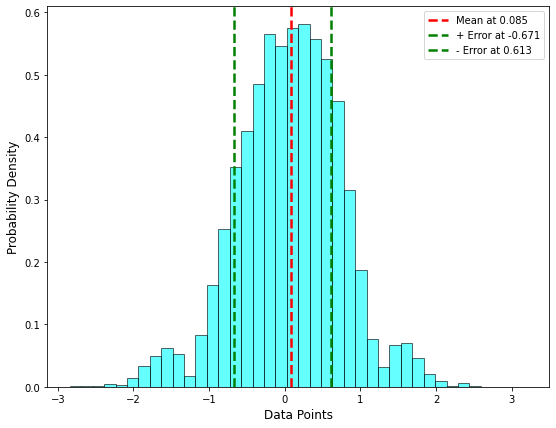

In [204]:
meas=[mean,-neg_error,pos_error]
name=["Mean","+ Error","- Error"]

plt.figure(figsize=(9,7))
plt.hist(achain, bins=40, density=True, alpha=0.6, color='cyan', edgecolor='black')
for measurement, name, color in zip(meas,name,["red","green","green"]):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name,round(measurement,3)), c=color)
plt.xlabel("Data Points",size='12')
plt.ylabel("Probability Density",size='12')
plt.legend(loc="upper right")
plt.show()

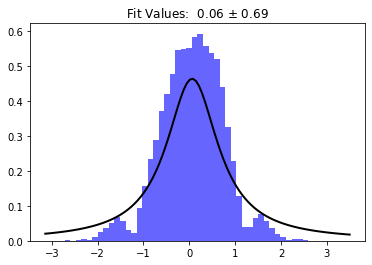

In [206]:
import numpy as np
from scipy.stats import cauchy
import matplotlib.pyplot as plt

data = achain

am=np.mean(data)
sm=np.std(data)
  
# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = cauchy.pdf(x, am, sm)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit Values:  {:.2f} $\pm$ {:.2f}".format(am, sm))
  
plt.show()